In [28]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

# 1. Load the dataset and display the first few rows
df = pd.read_csv("synthetic_covid19_data.csv")
print("First 5 rows of the dataset:")
print(df.head())

# 2. Clean the data (handle missing values, filter required columns)
df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'population', 'continent']]
df['date'] = pd.to_datetime(df['date'])
df = df.dropna(subset=['total_cases', 'new_cases', 'total_deaths'])







First 5 rows of the dataset:
         date      continent location  total_cases  new_cases  total_deaths  \
0  2021-11-19           Asia    India      6423388       2490        107051   
1  2021-09-12  North America   Russia      6550634       6980        481184   
2  2020-04-20         Europe   Canada      4304572       9134         15116   
3  2022-10-16           Asia  Germany      2234489       7661         20045   
4  2021-05-15         Europe      USA      9958614       1724        419543   

   new_deaths  total_tests  new_tests  positive_rate  ...  stringency_index  \
0         323     60016385       7386       0.904377  ...         69.259331   
1         697     28666409       6862       0.525850  ...          7.185287   
2         325     80352550      40108       0.791575  ...         14.823246   
3         624     89212990      91788       0.115291  ...         70.007502   
4         824      5364240      75023       0.927643  ...         28.972334   

   population  popula

/tmp/ipython-input-27-3213612280.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='Reds_r')


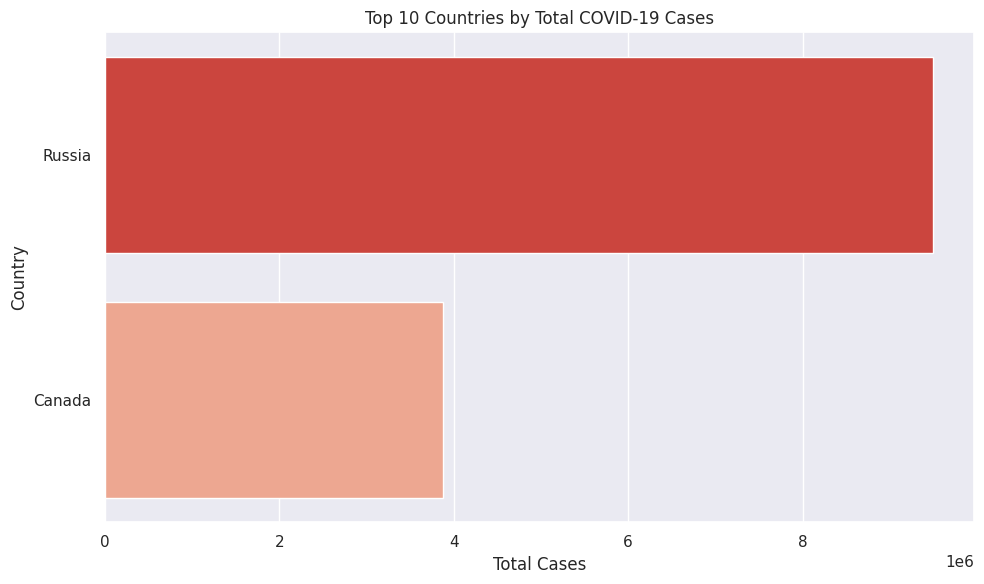

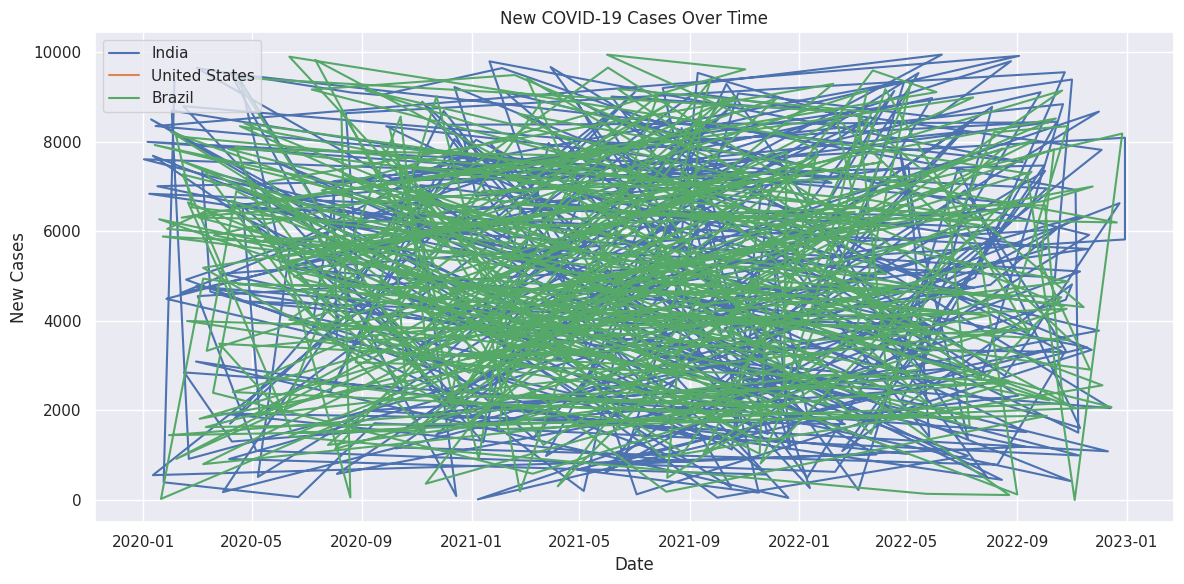

/tmp/ipython-input-27-3213612280.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_deaths_by_country.values, y=total_deaths_by_country.index, palette='Blues_r')


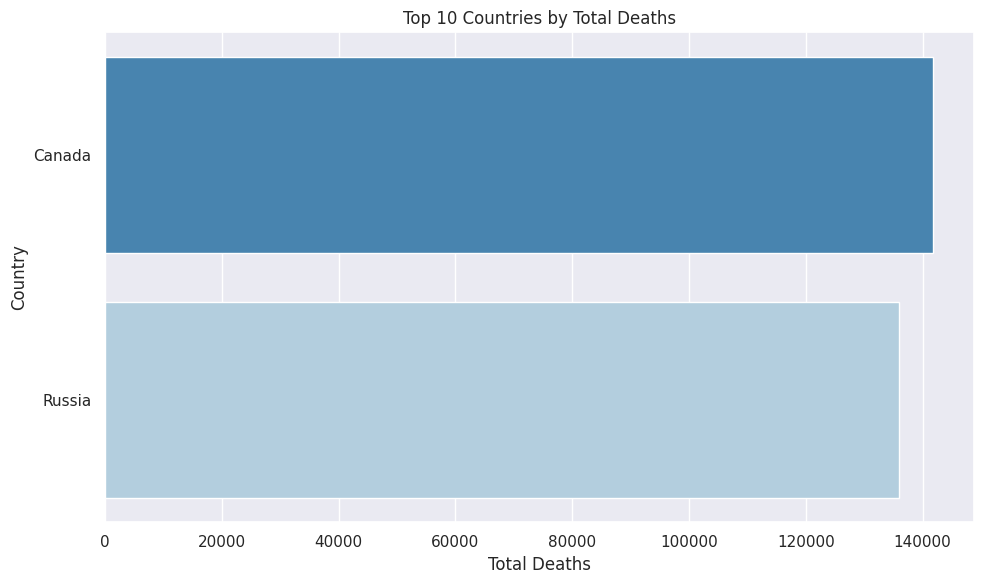

In [27]:
# 3. Visualizations

# a. Top 10 countries by total cases (latest date)
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]
top_10 = latest_df.groupby('location')['total_cases'].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_10.values, y=top_10.index, palette='Reds_r')
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# b. New cases trend over time for selected countries
selected_countries = ['India', 'United States', 'Brazil']
plt.figure(figsize=(12,6))
for country in selected_countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.title("New COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()

# c. Bar chart: Total deaths vs. total recoveries (Recovery not in dataset, so we use deaths only)
total_deaths_by_country = latest_df.groupby('location')['total_deaths'].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=total_deaths_by_country.values, y=total_deaths_by_country.index, palette='Blues_r')
plt.title("Top 10 Countries by Total Deaths")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

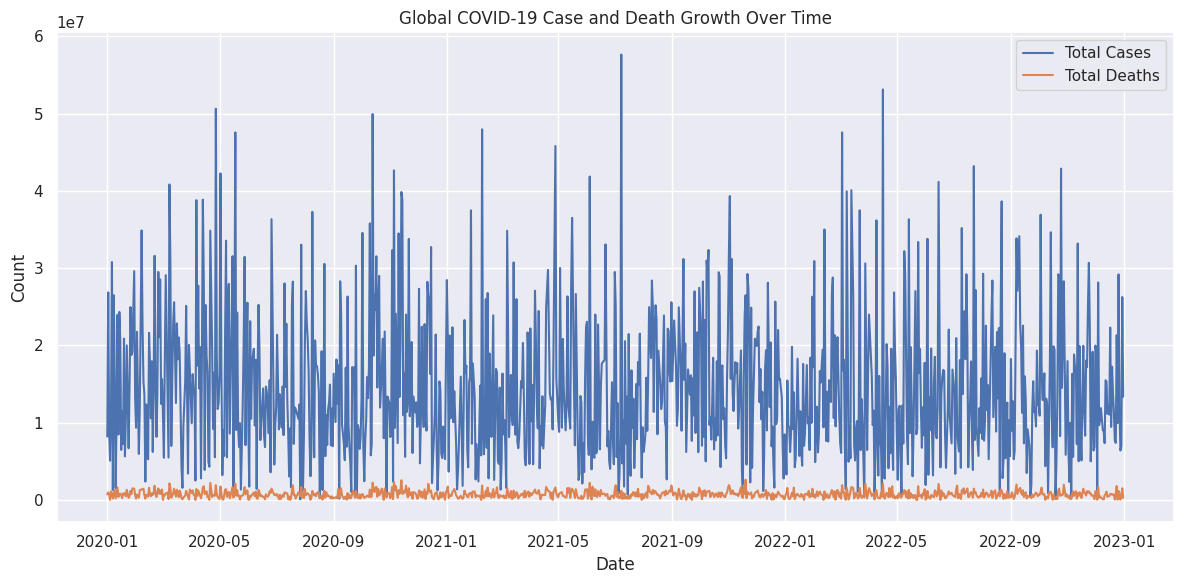

In [24]:
# 4. Group data by date to show global growth trend
global_trend = df.groupby('date')[['total_cases', 'total_deaths']].sum()
plt.figure(figsize=(12,6))
plt.plot(global_trend.index, global_trend['total_cases'], label='Total Cases')
plt.plot(global_trend.index, global_trend['total_deaths'], label='Total Deaths')
plt.title("Global COVID-19 Case and Death Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

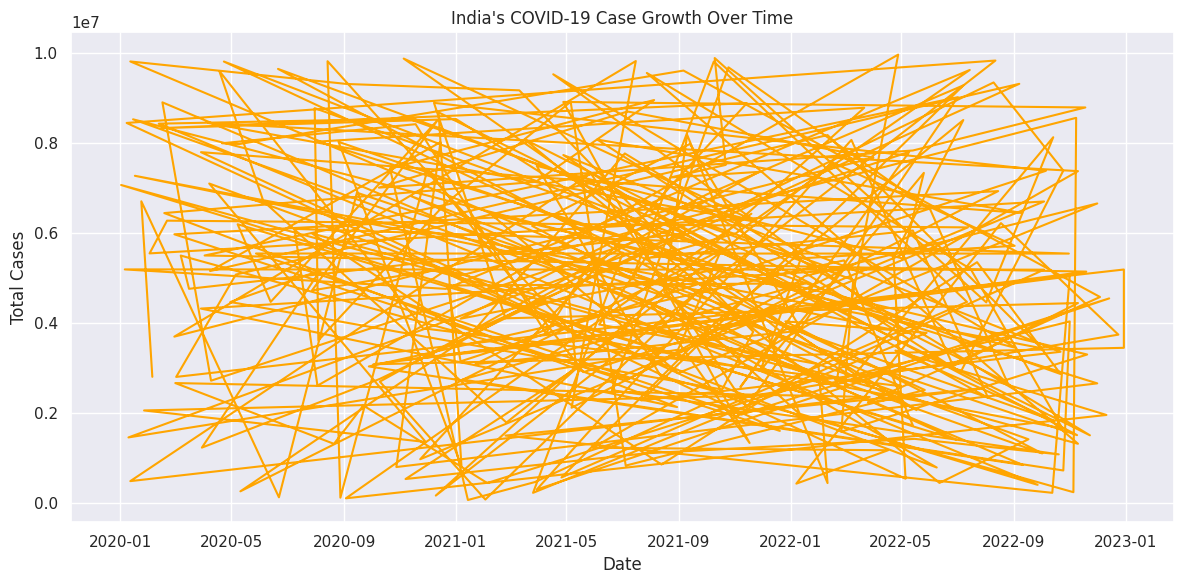

In [23]:
# 5. Line graph for India’s case growth
india_data = df[df['location'] == 'India']
plt.figure(figsize=(12,6))
plt.plot(india_data['date'], india_data['total_cases'], label='Total Cases in India', color='orange')
plt.title("India's COVID-19 Case Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.tight_layout()
plt.show()


In [22]:
# 6. Bonus: Calculate death rate
df['death_rate'] = (df['total_deaths'] / df['total_cases']) * 100
print("Death Rate Sample:")
print(df[['location', 'date', 'total_cases', 'total_deaths', 'death_rate']].head())

Death Rate Sample:
  location       date  total_cases  total_deaths  death_rate
0    India 2021-11-19      6423388        107051    1.666582
1   Russia 2021-09-12      6550634        481184    7.345610
2   Canada 2020-04-20      4304572         15116    0.351162
3  Germany 2022-10-16      2234489         20045    0.897073
4      USA 2021-05-15      9958614        419543    4.212865
